In [1]:
#importing libraries
import pandas as pd

In [2]:
# importing the dataset
data=pd.read_csv('../../Datasets/Project_practice/Monali Dambe - heart-disease.csv')

In [3]:
#Taking care of missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
#taking care of duplicate values
data_dup=data.duplicated().any()

In [5]:
data_dup

True

In [6]:
data=data.drop_duplicates()

In [7]:
data_dup=data.duplicated().any()

In [8]:
data_dup

False

## Data Preprocessing

In [9]:
#creating list of the categorical and continuous columns
cate_val=[]
cont_val=[]
for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [12]:
#Encoding categorical columns
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
cate_val.remove('sex')
cate_val.remove('target')

In [14]:
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [15]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [16]:
#feature Scaling
from sklearn.preprocessing import StandardScaler

In [17]:
st=StandardScaler()
st.fit(data[cont_val])
data[cont_val]=st.transform(data[cont_val])

In [18]:
data[cont_val]

,age,trestbps,chol,thalach,oldpeak
0,0.949794,0.764066,-0.261285,0.018826,1.084022
1,-1.928548,-0.091401,0.067741,1.636979,2.118926
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608
4,0.285561,-0.661712,2.080602,0.587366,-0.382092
...,...,...,...,...,...
298,0.285561,0.478910,-0.106449,-1.161988,-0.727060
299,-1.042904,-1.232023,0.338703,-0.768384,0.135360
300,1.503322,0.707035,-1.035462,-0.374779,2.032684
301,0.285561,-0.091401,-2.235438,-1.511859,0.135360


In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [20]:
#Splitting the dataset into train_test_split
X=data.drop('target',axis=1)
y=data['target']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [23]:
X.shape,X_train.shape,X_test.shape

((302, 22), (241, 22), (61, 22))

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log=LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [26]:
y_pred1=log.predict(X_test)

In [27]:
y_pred1

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(Y_test,y_pred1)

0.8360655737704918

# SVC

In [30]:
from sklearn.svm import SVC

In [31]:
svc=SVC()
svc.fit(X_train,Y_train)

SVC()

In [32]:
y_pred2=svc.predict(X_test)

In [33]:
y_pred2

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [34]:
accuracy_score(Y_test,y_pred2)

0.7868852459016393

# KNeighbors Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)


KNeighborsClassifier()

In [37]:
y_pred3=knn.predict(X_test)

In [38]:
y_pred3

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [39]:
accuracy_score(Y_test,y_pred3)

0.7704918032786885

## Non-Linear Machine Learning Algorithms

In [40]:
data=pd.read_csv('../../Datasets/Project_practice/Monali Dambe - heart-disease.csv')

In [41]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
data=data.drop_duplicates()

In [43]:
data.shape

(302, 14)

In [44]:
X=data.drop('target',axis=1)
y=data['target']

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred4=dt.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

## Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf=RandomForestClassifier()

In [52]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred5=rf.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred5)

0.8688524590163934

## Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gb=GradientBoostingClassifier()

In [57]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [58]:
y_pred6=gb.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred6)

0.8524590163934426

In [60]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'], 'Acc':[accuracy_score(Y_test,y_pred1),
                                                                           accuracy_score(Y_test,y_pred2),
                                                                           accuracy_score(Y_test,y_pred3),
                                                                           accuracy_score(y_test,y_pred4),
                                                                           accuracy_score(y_test,y_pred5),
                                                                           accuracy_score(y_test,y_pred6)]})

In [61]:
final_data

,Models,Acc
0,LR,0.836066
1,SVM,0.786885
2,KNN,0.770492
3,DT,0.786885
4,RF,0.868852
5,GB,0.852459


In [62]:
import seaborn as sns

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Acc'>

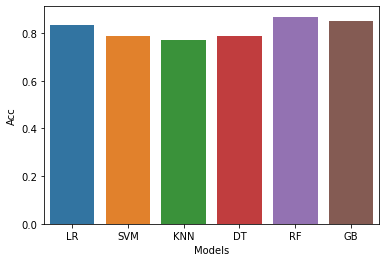

In [63]:
sns.barplot(final_data['Models'],final_data['Acc'])

In [64]:
X=data.drop('target',axis=1)
y=data['target']

In [65]:
X.shape

(302, 13)

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [68]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Prediction on new data

In [69]:
import pandas as pd

In [70]:
new_data=pd.DataFrame({'age':52,
                      'sex':1,
                      'cp':0,
                      'trestbps':125, 
                       'chol':212, 
                       'fbs':0, 
                       'restecg':1, 
                       'thalach':168,
                       'exang':0, 
                       'oldpeak':1.0, 
                       'slope':2, 
                       'ca':2, 
                       'thal':3,},index=[0])

In [71]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [72]:
QP=rf.predict(new_data)
if QP[0]==0:
    print('No Diseas')
else:
    print('Heart Diseas')

No Diseas


## Save model using pickle

In [73]:
import pickle

In [74]:
pickle.dump(rf,open('model_heart.pkl','wb'))

In [75]:
heart_Pre=pickle.load(open('model_heart.pkl','rb'))